<a href="https://colab.research.google.com/github/veliyorganci/Statistics_Exercises/blob/main/Cardiovascular_Disease_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Cardiovascular Disease Dataset

We will study with a dataset on Cardiovascular Disease.

We'll try to understand the concepts like

- true means,
- confidence intervals,
- one sample t test,
- independent samples t test,
- homogenity of variance check (Levene's test),
- One-way ANOVA,
- Chi-square test.

Dataset from: https://www.kaggle.com/datasets/sulianova/cardiovascular-disease-dataset

# Data Preparation

⭐ Import pandas, scipy.stats, seaborn, and matplotlib.pyplot libraries

In [1]:
import pandas as pd
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

⭐Run the following code to read in the "cardio.csv" file.

In [2]:
df = pd.read_csv("/content/cardio.csv", sep=";")

In [3]:
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [5]:
df.shape

(70000, 13)

In [6]:
df.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


⭐Let's get rid of the outliers, moreover blood pressure could not be negative value!

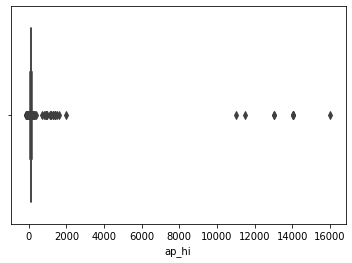

In [7]:
sns.boxplot(x="ap_hi", data=df)

In [8]:
df = df[df["ap_hi"]<250]
df = df[df["ap_hi"]>0]

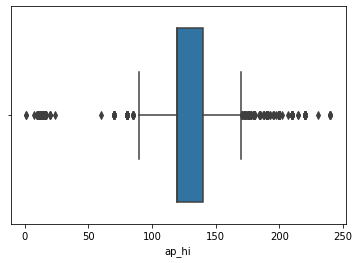

In [9]:
sns.boxplot(x="ap_hi", data=df)

In [14]:
iqr = stats.iqr(df.ap_hi)   # iqr değerine göre değerleri kısıtlayacağız, numpy da import edilmeli
iqr

20.0

In [12]:
import numpy as np


In [15]:
np.percentile(df.ap_hi, 75) 

140.0

In [17]:
np.percentile(df.ap_hi, 75) + 1.5*iqr

170.0

In [19]:
np.percentile(df.ap_hi, 25) - 1.5*iqr

90.0

In [20]:
df = df[df["ap_hi"]<170]
df = df[df["ap_hi"]>90]

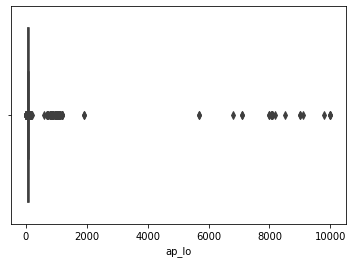

In [21]:
sns.boxplot(x="ap_lo", data=df)

In [24]:
df = df[df["ap_lo"]<110]  # göz kararı belirlediğimiz değerler
df = df[df["ap_lo"]>60]

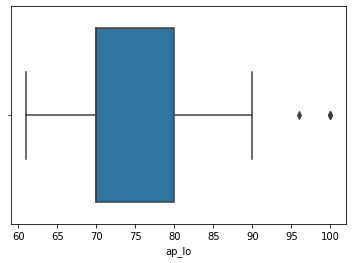

In [26]:
sns.boxplot(x="ap_lo", data=df)

In [27]:
df.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,1915.000000,1915.000000,1915.000000,1915.000000,1915.000000,1915.000000,1915.00000,1915.000000,1915.000000,1915.000000,1915.000000,1915.000000,1915.000000
mean,50335.814099,18329.510705,1.240731,162.594778,67.939243,100.280940,72.79530,1.245953,1.166580,0.093995,0.058486,0.797911,0.189034
std,28498.679905,2479.556190,0.427639,8.056733,13.396124,1.430898,5.38263,0.530745,0.473907,0.291898,0.234721,0.401663,0.391638
min,28.000000,14284.000000,1.000000,100.000000,30.000000,93.000000,61.00000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,26402.500000,16147.500000,1.000000,157.000000,59.000000,100.000000,70.00000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50396.000000,18264.000000,1.000000,162.000000,67.000000,100.000000,70.00000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74590.000000,20349.500000,1.000000,168.000000,75.000000,100.000000,80.00000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
max,99733.000000,23667.000000,2.000000,207.000000,159.000000,109.000000,100.00000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [28]:
df = df.sample(n=500)  # 500 ile sınırladık, bu veriseti ile devam edeceğiz.

In [29]:
df.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,500.000000,500.000000,500.00000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,49607.796000,18263.788000,1.22400,161.918000,67.226200,100.310000,72.592000,1.234000,1.168000,0.094000,0.064000,0.812000,0.168000
std,29459.727473,2442.203611,0.41734,8.449264,12.278958,1.585853,5.309795,0.517474,0.481913,0.292121,0.244998,0.391103,0.374241
min,28.000000,14326.000000,1.00000,100.000000,38.000000,93.000000,62.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,24663.250000,16130.500000,1.00000,156.000000,59.000000,100.000000,70.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,48909.000000,18271.500000,1.00000,161.000000,66.000000,100.000000,70.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74742.000000,20337.250000,1.00000,167.000000,75.000000,100.000000,73.500000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
max,99424.000000,23422.000000,2.00000,187.000000,121.000000,109.000000,96.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


## Task-1. Is the Systolic blood pressure population mean 122mmhg?

ap_hi => It's the Systolic blood pressure i.e. Pressure exerted when Blood is ejected in arteries. Normal value : 122 mm Hg for all adults aged 18 and over

⭐What is the mean for Systolic blood pressure?

In [30]:
df.ap_hi.mean()

100.31

⭐What is the standard deviation for Systolic blood pressure?

In [31]:
df.ap_hi.std()

1.5858530384999234

⭐What is the standard error of the mean for Systolic blood pressure?

In [32]:
df.ap_hi.sem()

0.0709215039282084

⭐What are the descriptive statistics of the mean for Systolic blood pressure?

In [33]:
df.ap_hi.describe()

count    500.000000
mean     100.310000
std        1.585853
min       93.000000
25%      100.000000
50%      100.000000
75%      100.000000
max      109.000000
Name: ap_hi, dtype: float64

## Confidence Interval using the t Distribution

Key Notes about Confidence Intervals

💡A point estimate is a single number.

💡A confidence interval, naturally, is an interval.

💡Confidence intervals are the typical way to present estimates as an interval range.

💡The point estimate is located exactly in the middle of the confidence interval.

💡However, confidence intervals provide much more information and are preferred when making inferences.

💡The more data you have, the less variable a sample estimate will be.

💡The lower the level of confidence you can tolerate, the narrower the confidence interval will be.

⭐Investigate the given task by calculating the confidence interval. (Use 90%, 95% and 99% CIs)

In [34]:
# güven aralığına bakıyoruz.
# % 99 

stats.t.interval(0.99, 499, loc=df.ap_hi.mean(), scale=df.ap_hi.std())

(96.20943175553468, 104.41056824446532)

In [35]:
# güven aralığına bakıyoruz.
# % 95 

stats.t.interval(0.95, 499, loc=df.ap_hi.mean(), scale=df.ap_hi.std())

(97.1942279254721, 103.4257720745279)

In [36]:
# güven aralığına bakıyoruz.
# % 90 

stats.t.interval(0.90, 499, loc=df.ap_hi.mean(), scale=df.ap_hi.std())

(97.69665218704544, 102.92334781295456)

In [ ]:
# soruya güven aralığına bakarak hayır diyebiliriz. 122 güven aralığına dahil olan bir değer değil.

## One Sample t Test

⭐Investigate the given task by using One Sample t Test.

Key Notes about Hypothesis Testing (Significance Testing)

💡Assumptions

💡Null and Alternative Hypothesis

💡Test Statistic

💡P-value

💡Conclusion

Conduct the significance test. Use scipy.stats.ttest_1samp

In [ ]:
#H0 : mu = 122
#H1 : mu =! 122

In [37]:
stats.ttest_1samp(df.ap_hi, 122)   # pvalue ve güven aralığı ile cevaplandı.

Ttest_1sampResult(statistic=-305.83107800359255, pvalue=0.0)

## Task-2. Is There a Significant Difference Between Males and Females in Systolic Blood Pressure?

H0: µ1 = µ2 ("the two population means are equal")

H1: µ1 ≠ µ2 ("the two population means are not equal")

⭐Show descriptives for 2 groups

In [38]:
df.groupby("gender").describe()["ap_hi"]    # gender 1 erkek, gender 2 kadın

,count,mean,std,min,25%,50%,75%,max
gender,,,,,,,,
1,388.0,100.304124,1.535214,93.0,100.0,100.0,100.0,109.0
2,112.0,100.330357,1.757293,95.0,100.0,100.0,100.0,109.0


In [ ]:
# five numbers summary birbirine benzer sonuçlar veriyor. Ancak test ile sonuca varacağız.

___🚀Test the assumption of homogeneity of variance Hint: Levene’s Test

The hypotheses for Levene’s test are:

H0: "the population variances of group 1 and 2 are equal"

H1: "the population variances of group 1 and 2 are not equal"

In [39]:
stats.levene(df[df["gender"]==1]["ap_hi"], df[df["gender"]==2]["ap_hi"])

LeveneResult(statistic=0.014225180452959597, pvalue=0.9051100532826538)

In [40]:
stat, p = stats.levene(df[df["gender"]==1]["ap_hi"],df[df["gender"]==2]["ap_hi"])
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('The population variances of group 1 and 2 are equal (fail to reject H0)')
else:
	print('The population variances of group 1 and 2 are not equal (reject H0)')

Statistics=0.014, p=0.905
The population variances of group 1 and 2 are equal (fail to reject H0)


___🚀Conduct the significance test. Use scipy.stats.ttest_ind

H0: µ1 = µ2 ("the two population means are equal")

H1: µ1 ≠ µ2 ("the two population means are not equal")

In [41]:
stats.ttest_ind(df[df["gender"]==1]["ap_hi"], df[df["gender"]==2]["ap_hi"], equal_var = True)

Ttest_indResult(statistic=-0.15406599201967686, pvalue=0.8776201162635878)

In [42]:
stats.ttest_ind(df[df["gender"]==1]["ap_hi"],df[df["gender"]==2]["ap_hi"], equal_var = True)

Ttest_indResult(statistic=-0.15406599201967686, pvalue=0.8776201162635878)

## Task-3. Is There a Relationship Between Glucose and Systolic Blood Pressure?

⭐Draw a boxplot to see the relationship.

In [51]:
import pandas as pd
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

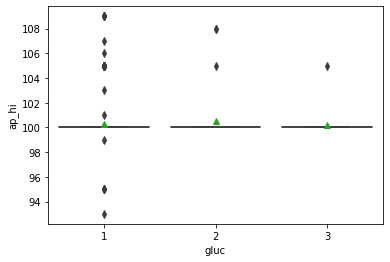

In [49]:
sns.boxplot(x="gluc", y="ap_hi", data=df, showmeans = True);

⭐Show the descriptive statistics of 3 groups.

In [50]:
df.groupby("gluc").describe()["ap_hi"]

,count,mean,std,min,25%,50%,75%,max
gluc,,,,,,,,
1,439.0,100.293850,1.575420,93.0,100.0,100.0,100.0,109.0
2,38.0,100.552632,1.954860,100.0,100.0,100.0,100.0,108.0
3,23.0,100.217391,1.042572,100.0,100.0,100.0,100.0,105.0


In [ ]:
#H0 : All means are equal (mu1 = mu2 = mu3)
#H1: At least one mean is different.

⭐Conduct the relavant statistical test to see if there is a significant difference between the mean of the groups.

In [55]:
stats.f_oneway(df[df["gluc"] == 1]["ap_hi"],
               df[df["gluc"] == 2]["ap_hi"],
               df[df["gluc"] == 3]["ap_hi"])

F_onewayResult(statistic=0.5057350432839928, pvalue=0.6033721449367975)

In [56]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd, MultiComparison

In [57]:
MultiComparison(df["ap_hi"], df["gluc"])

In [58]:
#bir değişkene atayalım

In [59]:
multicomp = MultiComparison(df["ap_hi"], df["gluc"])

In [60]:
multicomp.tukeyhsd(alpha=0.05)

In [ ]:
#bir değişkene atayalım

In [61]:
tukey = multicomp.tukeyhsd(alpha=0.05)

In [62]:
print(tukey)  # glukoz seviyesi normal olanlar (group1) ile yüksek olanları karşılaştırıyoruz (group2)

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
     1      2   0.2588 0.5924 -0.3722 0.8898  False
     1      3  -0.0765    0.9 -0.8747 0.7218  False
     2      3  -0.3352 0.6866 -1.3211 0.6506  False
---------------------------------------------------


## Task-4. Is There a Relationship Between Physical activity vs. Presence or absence of cardiovascular disease?

### Physical activity vs. Presence or absence of cardiovascular disease

In [ ]:
# H0 The two variables are independent

# H1 The two variables are not independent.

⭐Create a crosstab using Pandas.

In [64]:
ct = pd.crosstab(df.active, df.cardio)
ct

cardio,0,1
active,,
0,70,24
1,346,60


⭐Conduct chi-square test to see if there is a relationship between 2 categorical variables.

In [66]:
chi, p, dof, expected = stats.chi2_contingency(ct)  

In [67]:
print("test statistic", chi)
print("p-value", p)

test statistic 5.568867964957867
p-value 0.018282576944680527


In [68]:
dof

1

In [69]:
ct = pd.crosstab(df.cholesterol, df.cardio)
ct

cardio,0,1
cholesterol,,
1,345,60
2,57,16
3,14,8


In [70]:
stats.chi2_contingency(ct)

(8.533862129752542, 0.01402475824891048, 2, array([[336.96 ,  68.04 ],
        [ 60.736,  12.264],
        [ 18.304,   3.696]]))

In [71]:
chi, p, dof, expected = stats.chi2_contingency(ct)  

In [72]:
print("test statistic", chi)
print("p-value", p)

test statistic 8.533862129752542
p-value 0.01402475824891048


In [ ]:
# Kardio ile kolesterol arasında anlamlı ilişki çıktığı görülmektedir.